# YOLO v5

### 0. Install Yolov5

In [2]:
!rm -rf yolov5 && git clone --branch exp https://github.com/SeanAvery/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 2428, done.
remote: Total 2428 (delta 0), reused 0 (delta 0), pack-reused 2428
Receiving objects: 100% (2428/2428), 5.29 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (1596/1596), done.


In [3]:
! cd yolov5 && pip install -U -r requirements.txt


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (0.29.21)
     |████████████████████████████████| 11.6MB 270kB/s 
     |████████████████████████████████| 14.5MB 235kB/s 
     |████████████████████████████████| 49.4MB 57kB/s 
     |████████████████████████████████| 2.2MB 50.2MB/s 
     |████████████████████████████████| 276kB 51.6MB/s 
     |████████████████████████████████| 25.9MB 118kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 11)) (2.3.0)
Requirement already up-to-date: torch>=1.6.0 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 12)) (1.6.0+cu101)
Requirement already up-to-date: torchvision>=0.7.0 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 13)) (0.7.0+cu101)
     |████████████████████████████████| 71kB 10.5MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linu

### 1. Test out model on video input

In [8]:
!wget http://capslock.ai/sample_720p.jpg
!wget http://capslock.ai/14th_st.jpg

--2020-09-04 00:20:20--  http://capslock.ai/sample_720p.jpg
Resolving capslock.ai (capslock.ai)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to capslock.ai (capslock.ai)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59724 (58K) [image/jpeg]
Saving to: ‘sample_720p.jpg.1’

sample_720p.jpg.1   100%[===================>]  58.32K  --.-KB/s    in 0s      

2020-09-04 00:20:20 (379 MB/s) - ‘sample_720p.jpg.1’ saved [59724/59724]

--2020-09-04 00:20:20--  http://capslock.ai/14th_st.jpg
Resolving capslock.ai (capslock.ai)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to capslock.ai (capslock.ai)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 891341 (870K) [image/jpeg]
Saving to: ‘14th_st.jpg’

14th_st.jpg         100%[===================>] 870.45K  --.-KB/s    in 0.003s  

2020-09-04 00:20:20 (334 MB/s) - ‘14th_st.jpg’ saved [891341/891341]



In [10]:
import cv2

img = cv2.imread('14th_st.jpg')
img = cv2.resize(img, (640, 640))
cv2.imwrite('14th_st.jpg', img)

True

In [11]:
!cd yolov5 && python detect.py --source ../14th_st.jpg --img-size 640 --mdebug

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, mdebug=True, output='inference/output', save_txt=False, source='../14th_st.jpg', update=False, view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/1 /content/14th_st.jpg: 

In [ ]:
from IPython.display import Image, clear_output  # to display images

In [ ]:
!ls ./yolov5/inference/

20_20_object_prob.jpg  80_80_object_prob.jpg  output
40_40_object_prob.jpg  images


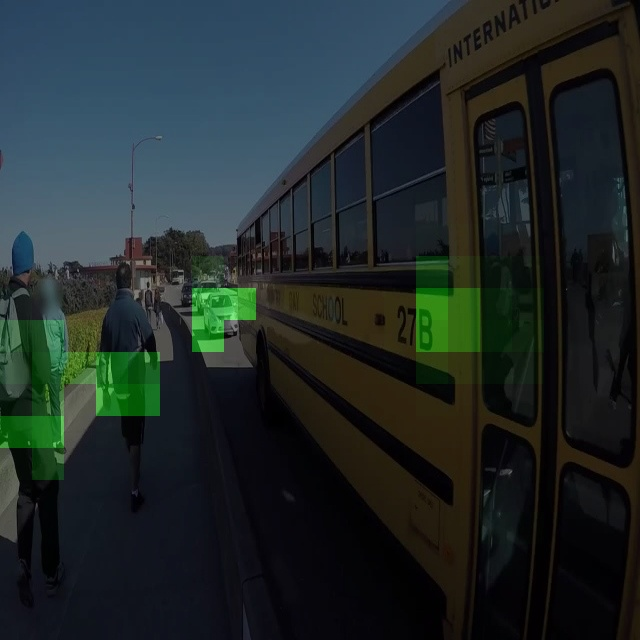

In [ ]:
Image(filename='./yolov5/inference/80_80_object_prob.jpg', width=900)
Image(filename='./yolov5/inference/40_40_object_prob.jpg', width=900)
Image(filename='./yolov5/inference/20_20_object_prob.jpg', width=900)

### 2. Export model to onnx

In [ ]:
!pip install onnx

     |████████████████████████████████| 7.4MB 6.6MB/s 


replace yaml file defaults



In [ ]:
!cd yolov5/models && wget https://github.com/TrojanXu/yolov5-tensorrt/blob/master/yolov5s.yaml

--2020-08-04 04:09:50--  https://github.com/TrojanXu/yolov5-tensorrt/blob/master/yolov5s.yaml
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov5s.yaml.1’

yolov5s.yaml.1          [ <=>                ]  88.94K  --.-KB/s    in 0.02s   

2020-08-04 04:09:50 (5.43 MB/s) - ‘yolov5s.yaml.1’ saved [91077]



In [ ]:
!cd yolov5 && python models/export.py

Traceback (most recent call last):
  File "models/export.py", line 9, in <module>
    from models.common import *
ModuleNotFoundError: No module named 'models'


KeyboardInterrupt: ignored

### 3. Simplyify model architecture

In [ ]:
!pip install onnx-simplifier

     |████████████████████████████████| 3.9MB 16.0MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.2.10-cp36-none-any.whl size=6499 sha256=e7a44bc921ef66631c4900048bc1077fa76e7f70c3483b26b39eb536ff41ed9d
  Stored in directory: /root/.cache/pip/wheels/a0/6b/aa/b3b099f96c24c783a74af4bd1b051b526ff927505e3ffc9f60
Successfully built onnx-simplifier


In [ ]:
!cd yolov5 && python3 -m onnxsim yolov5s.onnx yolov5s-simple.onnx

Simplifying...
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


### 4. Visualize model

In [ ]:
!pip install netron

     |████████████████████████████████| 1.4MB 2.8MB/s 


In [ ]:
!ls yolov5

data	    hubconf.py	models		  test.py	  utils
detect.py   inference	README.md	  train.py	  weights
Dockerfile  LICENSE	requirements.txt  tutorial.ipynb  yolov5s.pt


In [ ]:
import netron
netron.start('yolov5/yolov5s.onnx', port=3344)


Stopping http://localhost:3344
Serving 'yolov5/yolov5s.onnx' at http://localhost:3344


In [ ]:
!dpkg -i nv-tensorrt-repo-ubuntu1804-cuda10.0-trt5.1.2.2-rc-20190227_1-1_amd64.deb
!apt-key add /var/nv-tensorrt-repo-cuda10.0-trt5.1.2.2-rc-20190227/7fa2af80.pub
!apt-get update
!apt-get install -y --no-install-recommends libnvinfer5=5.1.2-1+cuda10.0
!apt-get install -y --no-install-recommends libnvinfer-dev=5.1.2-1+cuda10.0
!apt-get install tensorrt
!apt-get install python3-libnvinfer-dev
!apt-get install uff-converter-tf


dpkg: error: cannot access archive 'nv-tensorrt-repo-ubuntu1804-cuda10.0-trt5.1.2.2-rc-20190227_1-1_amd64.deb': No such file or directory
gpg: can't open '/var/nv-tensorrt-repo-cuda10.0-trt5.1.2.2-rc-20190227/7fa2af80.pub': No such file or directory
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates In

In [ ]:
from google.colab.output import eval_js

print(eval_js("google.colab.kernel.proxyPort(3344)"))


https://6pp6ma8zdco-496ff2e9c6d22116-3344-colab.googleusercontent.com/
